### Import libraries

In [1]:
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf
from PIL import Image
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
batch_size= 51  # set to 90 because we have 90 images in each subfolder

Using ImageDataGenerator class here I fetch all images

In [3]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(
                rescale = 1/255,
                width_shift_range = 20,
                height_shift_range = 20,
                horizontal_flip = False,
                fill_mode = "nearest",
                zca_whitening = True,
                zca_epsilon = 1e-06,
                channel_shift_range = 13)

vali_datagen = ImageDataGenerator(rescale = 1/255, validation_split = 0.30)

# Flow training images in batches of 22 using img_datagen generator
train_generator = train_datagen.flow_from_directory(
        'BAPL_Dataset',  # This is the source directory for training images
        target_size=(128, 128),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['BAPL_0_1', 'BAPL_2_3'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical',
        subset='training')

validation_generator = vali_datagen.flow_from_directory(
    'BAPL_Dataset', # same directory as training data
    target_size=(128, 128),
    batch_size=batch_size,
    classes = ['BAPL_0_1', 'BAPL_2_3'],
    class_mode='categorical',
    subset='validation') # set as validation data

# for test
test_generator = vali_datagen.flow_from_directory(
        'Test_Dataset',  # This is the source directory for testing images
        target_size=(128, 128),  # All images will be resized to 200 x 200
        batch_size=batch_size,
        # Specify the classes explicitly
        classes = ['BAPL_0_1', 'BAPL_2_3'],
        # Since we use categorical_crossentropy loss, we need categorical labels
        class_mode='categorical')


C:\Users\neudo\anaconda3\lib\site-packages\keras\preprocessing\image.py:1285: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 7210 images belonging to 2 classes.
Found 2162 images belonging to 2 classes.
Found 1020 images belonging to 2 classes.


## Model Implementation

Define the model and its layers

In [4]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 200x 200 with 3 bytes color
    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.4),
    #The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 2 classes with the softmax activation
    tf.keras.layers.Dense(2, activation='softmax')
])

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 63, 63, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 30, 30, 32)        0

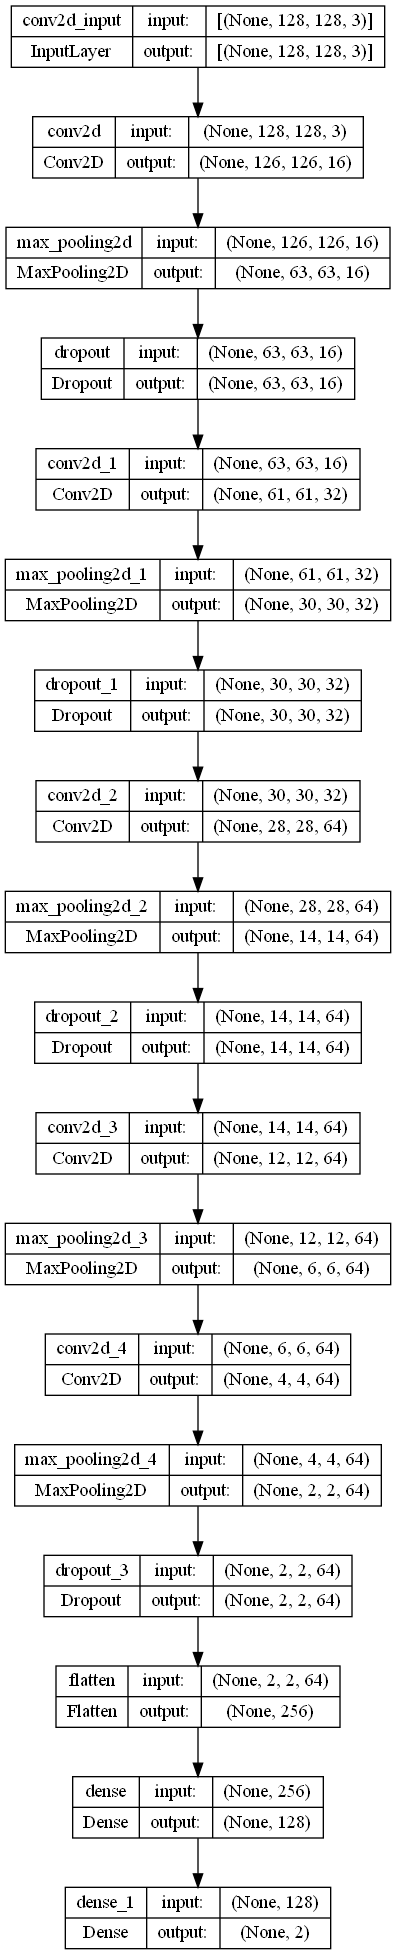

In [6]:
import keras.utils.vis_utils
from importlib import reload
reload(keras.utils.vis_utils)


from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

Compile the model

In [7]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

C:\Users\neudo\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [8]:
total_sample= train_generator.n

In [9]:
train_generator.samples

7210

In [10]:
n_epochs = 40  #increase the number of epochs to get more high accuracy. Each epoch took 5 to 8 mins to ru

In [11]:
hist = model.fit(
        train_generator, 
        steps_per_epoch=train_generator.samples // batch_size,  
        validation_data= validation_generator,
        validation_steps = validation_generator.samples // batch_size,
        epochs=n_epochs,
        verbose=1)  

C:\Users\neudo\anaconda3\lib\site-packages\keras\preprocessing\image.py:1663: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
C:\Users\neudo\anaconda3\lib\site-packages\keras\preprocessing\image.py:1682: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/40
141/141 [==============================] - 63s 435ms/step - loss: 0.6826 - acc: 0.5723 - val_loss: 0.6686 - val_acc: 0.5770
Epoch 2/40
141/141 [==============================] - 61s 432ms/step - loss: 0.6346 - acc: 0.6245 - val_loss: 0.6770 - val_acc: 0.5770
Epoch 3/40
141/141 [==============================] - 61s 430ms/step - loss: 0.5835 - acc: 0.6745 - val_loss: 0.5558 - val_acc: 0.6555
Epoch 4/40
141/141 [==============================] - 63s 444ms/step - loss: 0.5306 - acc: 0.7226 - val_loss: 0.7085 - val_acc: 0.5065
Epoch 5/40
141/141 [==============================] - 63s 444ms/step - loss: 0.4988 - acc: 0.7427 - val_loss: 0.3792 - val_acc: 0.7937
Epoch 6/40
141/141 [==============================] - 61s 435ms/step - loss: 0.4757 - acc: 0.7624 - val_loss: 0.5079 - val_acc: 0.6928
Epoch 7/40
141/141 [==============================] - 61s 429ms/step - loss: 0.4701 - acc: 0.7684 - val_loss: 0.4442 - val_acc: 0.7358
Epoch 8/40
141/141 [==============================] - 6

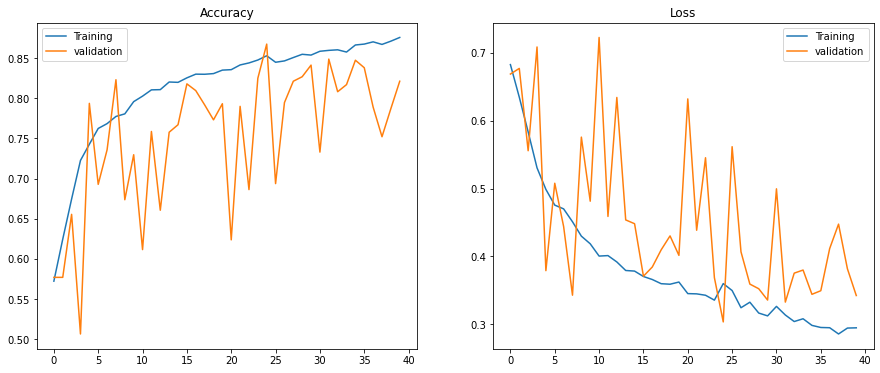

In [14]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['acc'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_acc'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()
plt.show()

### Predict on test dataset

In [15]:
preds = model.predict(test_generator)
pred = [np.argmax(i) for i in preds]
pred[:20]  #prediction on first 5 subjects from test datset

20/20 [==============================] - 2s 94ms/step


[1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0]

In [16]:
len(test_generator)

20

In [17]:
actual = test_generator.classes

#### Classification report

In [18]:
print("Classification Report:\n")
print(classification_report(pred,actual))

Classification Report:

              precision    recall  f1-score   support

           0       0.64      0.50      0.56       661
           1       0.35      0.49      0.41       359

    accuracy                           0.50      1020
   macro avg       0.50      0.49      0.48      1020
weighted avg       0.54      0.50      0.51      1020



#### Confusion matrix

Confusion Matrix


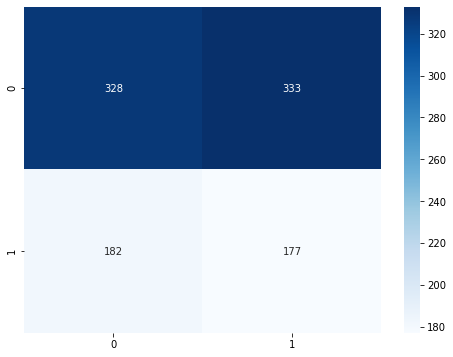

In [19]:
print("Confusion Matrix")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred,actual),annot = True, fmt = 'd', cmap = 'Blues');
plt.savefig('Confusion-Matrix_Model_4.png')

#### ROC curve

In [20]:
from sklearn.metrics import roc_curve, auc
n_classes =2
from itertools import cycle

In [21]:
X,y = next(test_generator)   #extract first batch from test dataset to plot ROC curve
pred_prob1 = model.predict(X)

2/2 [==============================] - 0s 35ms/step


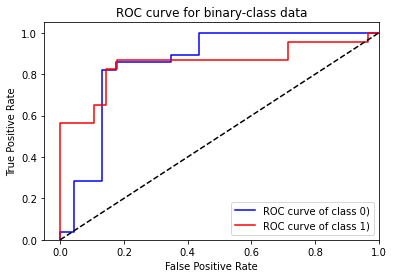

In [22]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_prob1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve for binary-class data')
plt.legend(loc="lower right")
plt.savefig('ROC_Model_4.png')
plt.show()

##### Save the model

In [23]:
model.save("final_fourth.h5")

#### model prediction on 90 images

##### Using the 'next' function we can extract first batch of 90 images (first subject)

In [24]:
X,y = next(test_generator)  

In [25]:
X.shape

(51, 128, 128, 3)

In [26]:
pred_prob1 = model.predict(X)

2/2 [==============================] - 0s 40ms/step


In [27]:
pred_prob1.shape

(51, 2)

In [28]:
#uncomment the below line to see accuracy on each image from 90 images
#pred_prob1   

In [29]:
pred_sc = pred_prob1.sum(axis=0) # sum all the accuracy on both classes to see which class has high score

In [30]:
pred_sc  

# class 0 (BAPL_1) has less score 43.16 and class 1(BAPL_2_3) has more accuracy (46.83) which means model predict class_1. 
# The score may be changed for other subjects on every iteration.

array([28.298698, 22.701303], dtype=float32)

### Now we can predict for any subject of 90 images

In [31]:
sub_dir = os.path.join('Test_Dataset\\BAPL_2_3\\00609184')  #give the path of new subject

In [32]:
sub_dir_image_names = os.listdir(sub_dir)
print(sub_dir_image_names[:5]) #print names of first 5 images

['EXPORT__15.jpg', 'EXPORT__16.jpg', 'EXPORT__17.jpg', 'EXPORT__18.jpg', 'EXPORT__19.jpg']


In [33]:
#check total images in sub_dir path
print('total images:', len(os.listdir(sub_dir)))

total images: 51


#### Plot all 90 images

In [34]:
from PIL import Image

In [35]:
# import glob
# from IPython.display import Image, display
# all_image =[]
# for imageName in glob.glob('Test_Dataset\\BAPL_2_3\\00609184/*.jpg'): #assuming JPG
#     all_image.append(Image(filename=imageName))
#     display(Image(filename=imageName))
#     print(imageName)

#### Now predict the model for above subject

In [36]:
from tensorflow.keras.models import load_model
import skimage
from skimage.transform import rescale,resize
import numpy as np
import glob
import cv2

In [37]:
model = load_model("final_second.h5")

In [38]:
preds = model.predict(test_generator)
pred = [np.argmax(i) for i in preds]

20/20 [==============================] - 2s 92ms/step


In [39]:
actual = test_generator.classes

In [40]:
from sklearn.metrics import confusion_matrix,classification_report
print('Classification Report')
target_names = ['BAPL_1', 'BAPL_2_3']
print(classification_report(actual, pred,target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      BAPL_1       0.52      0.76      0.62       510
    BAPL_2_3       0.55      0.30      0.39       510

    accuracy                           0.53      1020
   macro avg       0.54      0.53      0.50      1020
weighted avg       0.54      0.53      0.50      1020



In [41]:
# Evaluate on test  dataset
scores = model.evaluate(test_generator)
print("%s%s: %.3f%%" % ("evaluate ",model.metrics_names[1], scores[1]*100))

20/20 [==============================] - 2s 85ms/step - loss: 0.5580 - acc: 0.7225
evaluate acc: 72.255%


In [42]:
for file in glob.glob("Test_Dataset\\BAPL_0_1\\01145762/*.jpg"):  #change path 
    encimg=cv2.imread(file)
    img = cv2.resize(encimg, (200,200))
    img_arr = np.zeros((1,200,200,3))
    img_arr[0, :, :, :] = img/255.
    pred = model.predict(img_arr)
print(pred)

[0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

##### It predict class 0 because class 0  has high avcuracy.

# END

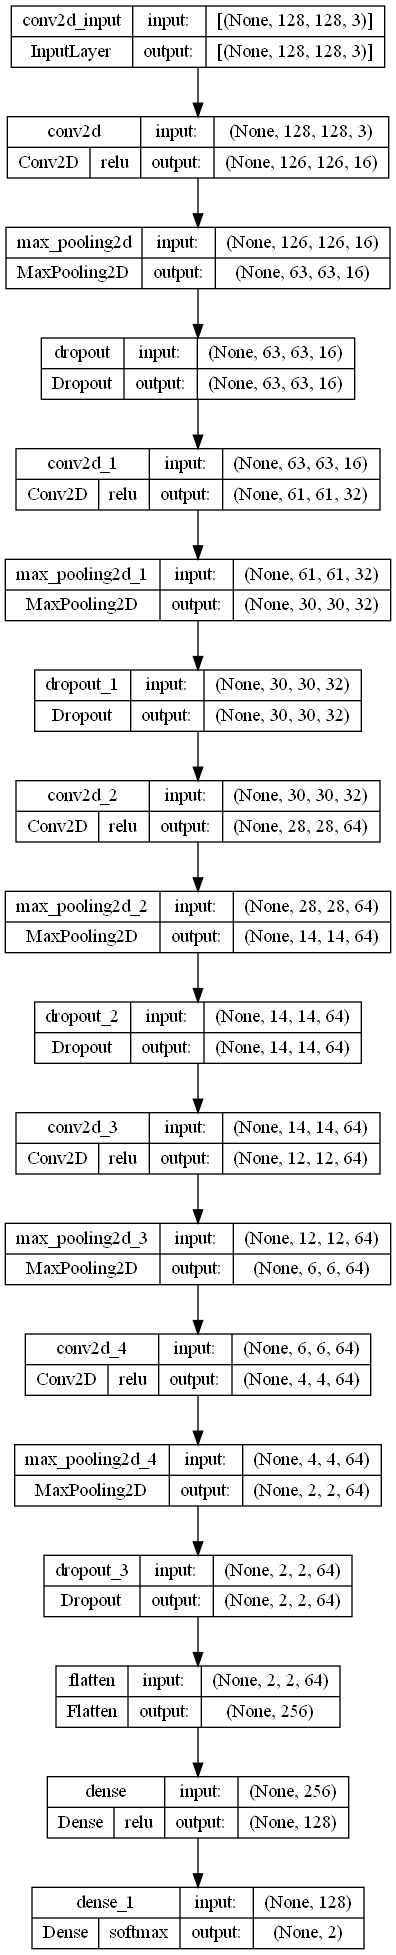

In [38]:
from keras.utils.vis_utils import plot_model
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True,
)